## The mixed layer
[<!-- module-gfdocean badge --><span class="module module-gfdocean">Geophysical Fluid Dynamics of the Oceans</span>](module-gfdocean) 
```{index} Mixed layer
```
In this notebook, the mixed layer will be investigated using NetCDF data from the NOAA (National Oceanic and Atmosphereric Administration). 

In [ ]:
import fsspec
import xarray as xr

The mixed layer is mixed by the winds on the surface creating a homogeneous layer. It is being mixed by wind stress, eddies, kinematic viscosity and convection. The stronger the winds, the deeper the mixed layer. The mixed layer is deeper in the Winter than in Summer. In the Winter, the surface water cooles so it becomes denser causing convection as it is more dense than the layer below. More turbulence also deepens the mixed layer.

<img src="https://www.coexploration.org/bermuda/assets/images/thermocline.jpg" alt="image info" width="400" 
     height="400"/>



The mixed layer is about 10-200m thick depending on stratification (density gradients), season, wind stress, convection and velocity gradient (turbulence and eddies).

To find out more about this dataset, we can evaluate a few factors: 
You can also try this out for yourself to see how much information is contained in this dataset.

In [62]:
# evaluate the metadata of this Dataset
ocean_data

<xarray.Dataset>
Dimensions:                       (n_param: 3, n_levels: 77, n_history: 4, n_calib: 1)
Dimensions without coordinates: n_param, n_levels, n_history, n_calib
Data variables: (12/65)
    data_type                     object b'Argo profile    '
    format_version                object b'3.1 '
    handbook_version              object b'1.2 '
    reference_date_time           object b'19500101000000'
    date_creation                 object b'20161104225754'
    date_update                   object b'20170714162347'
    ...                            ...
    parameter                     (n_calib, n_param) object b'PRES           ...
    scientific_calib_equation     (n_calib, n_param) object b'PRES_ADJUSTED (...
    scientific_calib_coefficient  (n_calib, n_param) object b'Surface pressur...
    scientific_calib_comment      (n_calib, n_param) object b'Pressure adjust...
    scientific_calib_date         (n_calib, n_param) object b'20170714162348'...
    crs                           int32 -2147483647
Attributes: (12/49)
    title:                           Argo float vertical profile
    institution:                     CORIOLIS
    source:                          Argo float
    history:                         2018-06-09T01:59:23Z csun convAGDAC.f90 ...
    references:                      http://www.nodc.noaa.gov/argo/
    user_manual_version:             3.1
    ...                              ...
    time_coverage_end:               2015-09-07T12:29:26Z
    time_coverage_duration:          point
    time_coverage_resolution:        point
    gadr_ConventionVersion:          GADR-3.0
    gadr_program:                    convAGDAC.f90
    gadr_programVersion:             1.0

In [63]:
print('The location of this dataset is at (', ocean_data['longitude'].data,',', ocean_data['latitude'].data, ')')
print('The minimum value of temperature in this part of the ocean is', min(ocean_data['temp'].data), 'deg Celcius')
print('The maximum value of temperature in this part of the ocean is', max(ocean_data['temp'].data), 'deg Celcius')

The location of this dataset is at ( -3.6549999999999727 , -10.097 )
The minimum value of temperature in this part of the ocean is 3.397 deg Celcius
The maximum value of temperature in this part of the ocean is 22.737 deg Celcius


Text(0, 0.5, 'Depth from surface in number of levels')

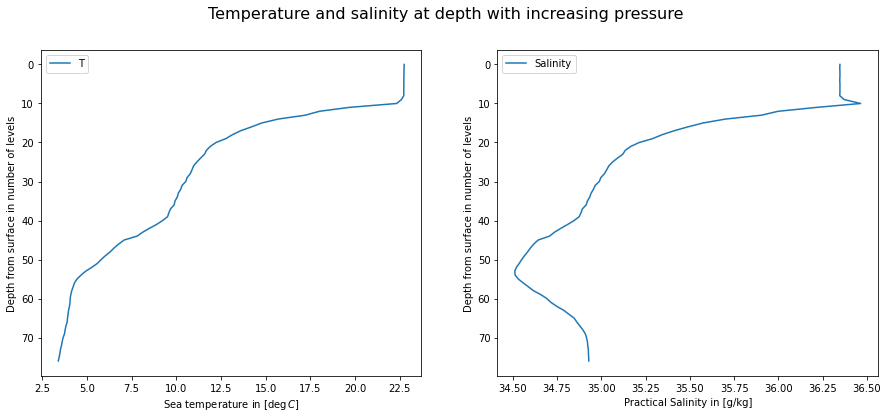

In [64]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

fig.suptitle('Temperature and salinity at depth with increasing pressure', fontsize=16)

ocean_data.temp.plot(y='n_levels', ax=ax[0], yincrease=False, label='T')
ocean_data.psal.plot(y='n_levels', ax=ax[1], yincrease=False, label='Salinity')

ax[0].legend()
ax[1].legend()

ax[0].set_xlabel('Sea temperature in [$\deg C $]')
ax[0].set_ylabel('Depth from surface in number of levels')
ax[1].set_xlabel('Practical Salinity in [g/kg]')
ax[1].set_ylabel('Depth from surface in number of levels')

From the above plots, it can be seen that temperature and salinity look homogeneous in the mixed layer.
Below the mixed layer is the thermocline which is a region where the temperature gradient is very steep. The termocline is between 300 and 1000m and is steepest for example in the Artic where fresh cold water overlies warmer watter.

### Temperature-salinity relationship
Next, a temperature-salinity profile can be plotted that is independent of depth.

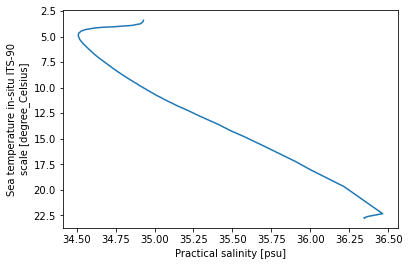

In [74]:
# swap dimensions to temperature data
ocean_data_temp = argo.swap_dims({'n_levels': 'temp'}) 
ocean_data_temp.psal.plot(y='temp', yincrease=False, label='Practical salinity')